<a href="https://colab.research.google.com/github/noerAditama/TA-Kualitas-Beras/blob/master/VGG_16Net_Dataset_Flash_Uji_No_Flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix Uji Smartphone VGG-16Net_Dataset_Flash_Uji_No Flash

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [7]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
          4, 4, 4, 4, 4, 4, 4, 4, 4, 4,  
          5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
          7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
          8, 8, 8, 8, 8, 8, 8, 8, 8, 8,]
y_pred = [6, 6, 2, 2, 6, 6, 6, 6, 6, 6,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          3, 3, 3, 3, 3, 3, 3, 6, 6, 5,
          5, 2, 7, 5, 6, 6, 2, 2, 3, 6,
          5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
          6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
          2, 6, 6, 6, 2, 2, 6, 7, 6, 7,
          8, 1, 8, 1, 8, 8, 1, 1, 8, 8]


In [5]:
labels = ['Ir64_medium', 'Ir64_tidak_layak', 'ir64_premium',
          'pandan_wangi_medium', 'pandan_wangi_premium', 'pandan_wangi_tidak_layak', 
          'rojo_lele_medium', 'rojo_lele_premium', 'rojo_lele_tidak_layak']

Normalized confusion matrix
[[0.  0.  0.2 0.  0.  0.  0.8 0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.7 0.  0.1 0.2 0.  0. ]
 [0.  0.  0.3 0.1 0.  0.2 0.3 0.1 0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.3 0.  0.  0.  0.5 0.2 0. ]
 [0.  0.4 0.  0.  0.  0.  0.  0.  0.6]]


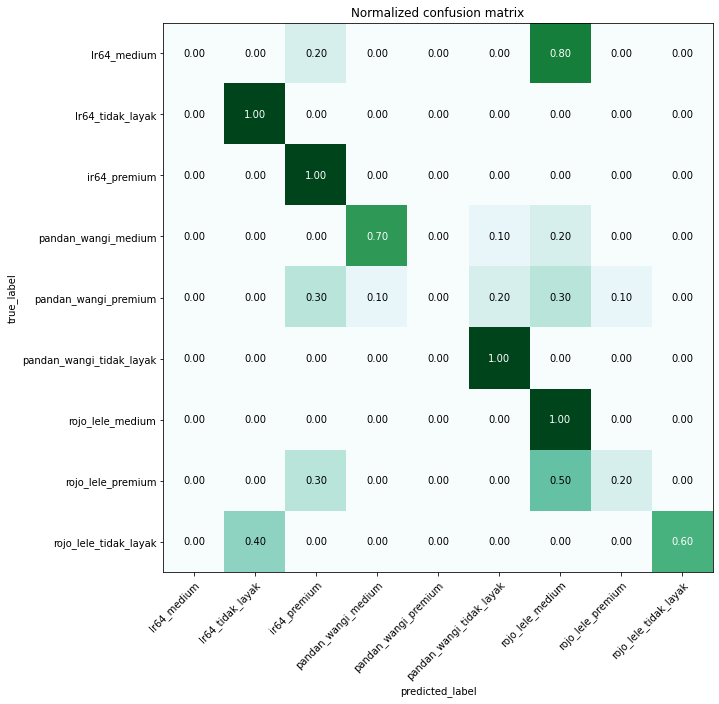

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.BuGn):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='true_label',
           xlabel='predicted_label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')